In [1]:
%pylab inline
import pandas as pd
import glob
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Load and Organize the Data

In [2]:
pdbid='bpti'
csvfiles = glob.glob(pdbid+'_*-dfianalysis.csv')
titles = map(lambda x: x.replace(pdbid+'_','').replace('-dfianalysis.csv',''),csvfiles)
data = pd.concat( [pd.read_csv(fname, index_col='ResI') for fname in csvfiles], keys=titles, names=['window','ResI'])

In [3]:
df_windows = pd.DataFrame()
for win, df_dfi in data.groupby(level=0):
    df_windows[win] = df_dfi.ix[:].reset_index().set_index('ResI').pctdfi

In [4]:
rawdfi_windows = pd.DataFrame()
for win, df_dfi in data.groupby(level=0):
    rawdfi_windows[win] = df_dfi.ix[:].reset_index().set_index('ResI').dfi

In [5]:
def sort_cols(start,end,incr,Verbose=False):
    """
    Given a number for the start and end of the trajectory, and the icrement of the frames
    produce an ordered set of columns 
    """
    cols = []
    assert isinstance(start,int)
    assert isinstance(end,int)
    assert isinstance(incr,int)
    lower = int(start)
    upper = lower + incr 
    while(lower < end):
        entry = '_'.join( np.array([lower,upper],dtype=str) )
        if(Verbose):
            print entry
        cols.append(entry)
        lower = upper 
        upper = lower + incr
    cols.append('ENM')
    return cols 

In [6]:
cols = sort_cols(0,15000,50,Verbose=False)

In [7]:
df_windows = df_windows[cols]

In [8]:
df_windows.head()

,0_50,50_100,100_150,150_200,200_250,250_300,300_350,350_400,400_450,450_500,...,14550_14600,14600_14650,14650_14700,14700_14750,14750_14800,14800_14850,14850_14900,14900_14950,14950_15000,ENM
ResI,,,,,,,,,,,,,,,,,,,,,
1,0.965517,0.862069,0.931034,0.965517,0.965517,0.948276,0.965517,0.965517,0.913793,0.913793,...,0.896552,0.965517,0.965517,0.965517,0.948276,0.965517,0.896552,0.948276,0.948276,0.603448
2,0.931034,0.758621,0.758621,0.913793,0.931034,0.913793,0.844828,0.913793,0.758621,0.793103,...,0.793103,0.879310,0.879310,0.827586,0.913793,0.879310,0.879310,0.793103,0.931034,0.637931
3,0.879310,0.741379,0.637931,0.810345,0.827586,0.879310,0.775862,0.758621,0.672414,0.844828,...,0.500000,0.793103,0.758621,0.810345,0.931034,0.844828,0.844828,0.827586,0.879310,0.689655
4,0.741379,0.465517,0.810345,0.758621,0.741379,0.896552,0.827586,0.810345,0.637931,0.879310,...,0.655172,0.413793,0.724138,0.793103,0.793103,0.672414,0.448276,0.931034,0.758621,0.517241
5,0.482759,0.327586,0.413793,0.586207,0.275862,0.568966,0.448276,0.586207,0.500000,0.724138,...,0.275862,0.431034,0.362069,0.534483,0.534483,0.206897,0.258621,0.534483,0.568966,0.068966


# RMSD Calcultion 

# Correlation with ENM

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.]),
 <a list of 7 Text xticklabel objects>)

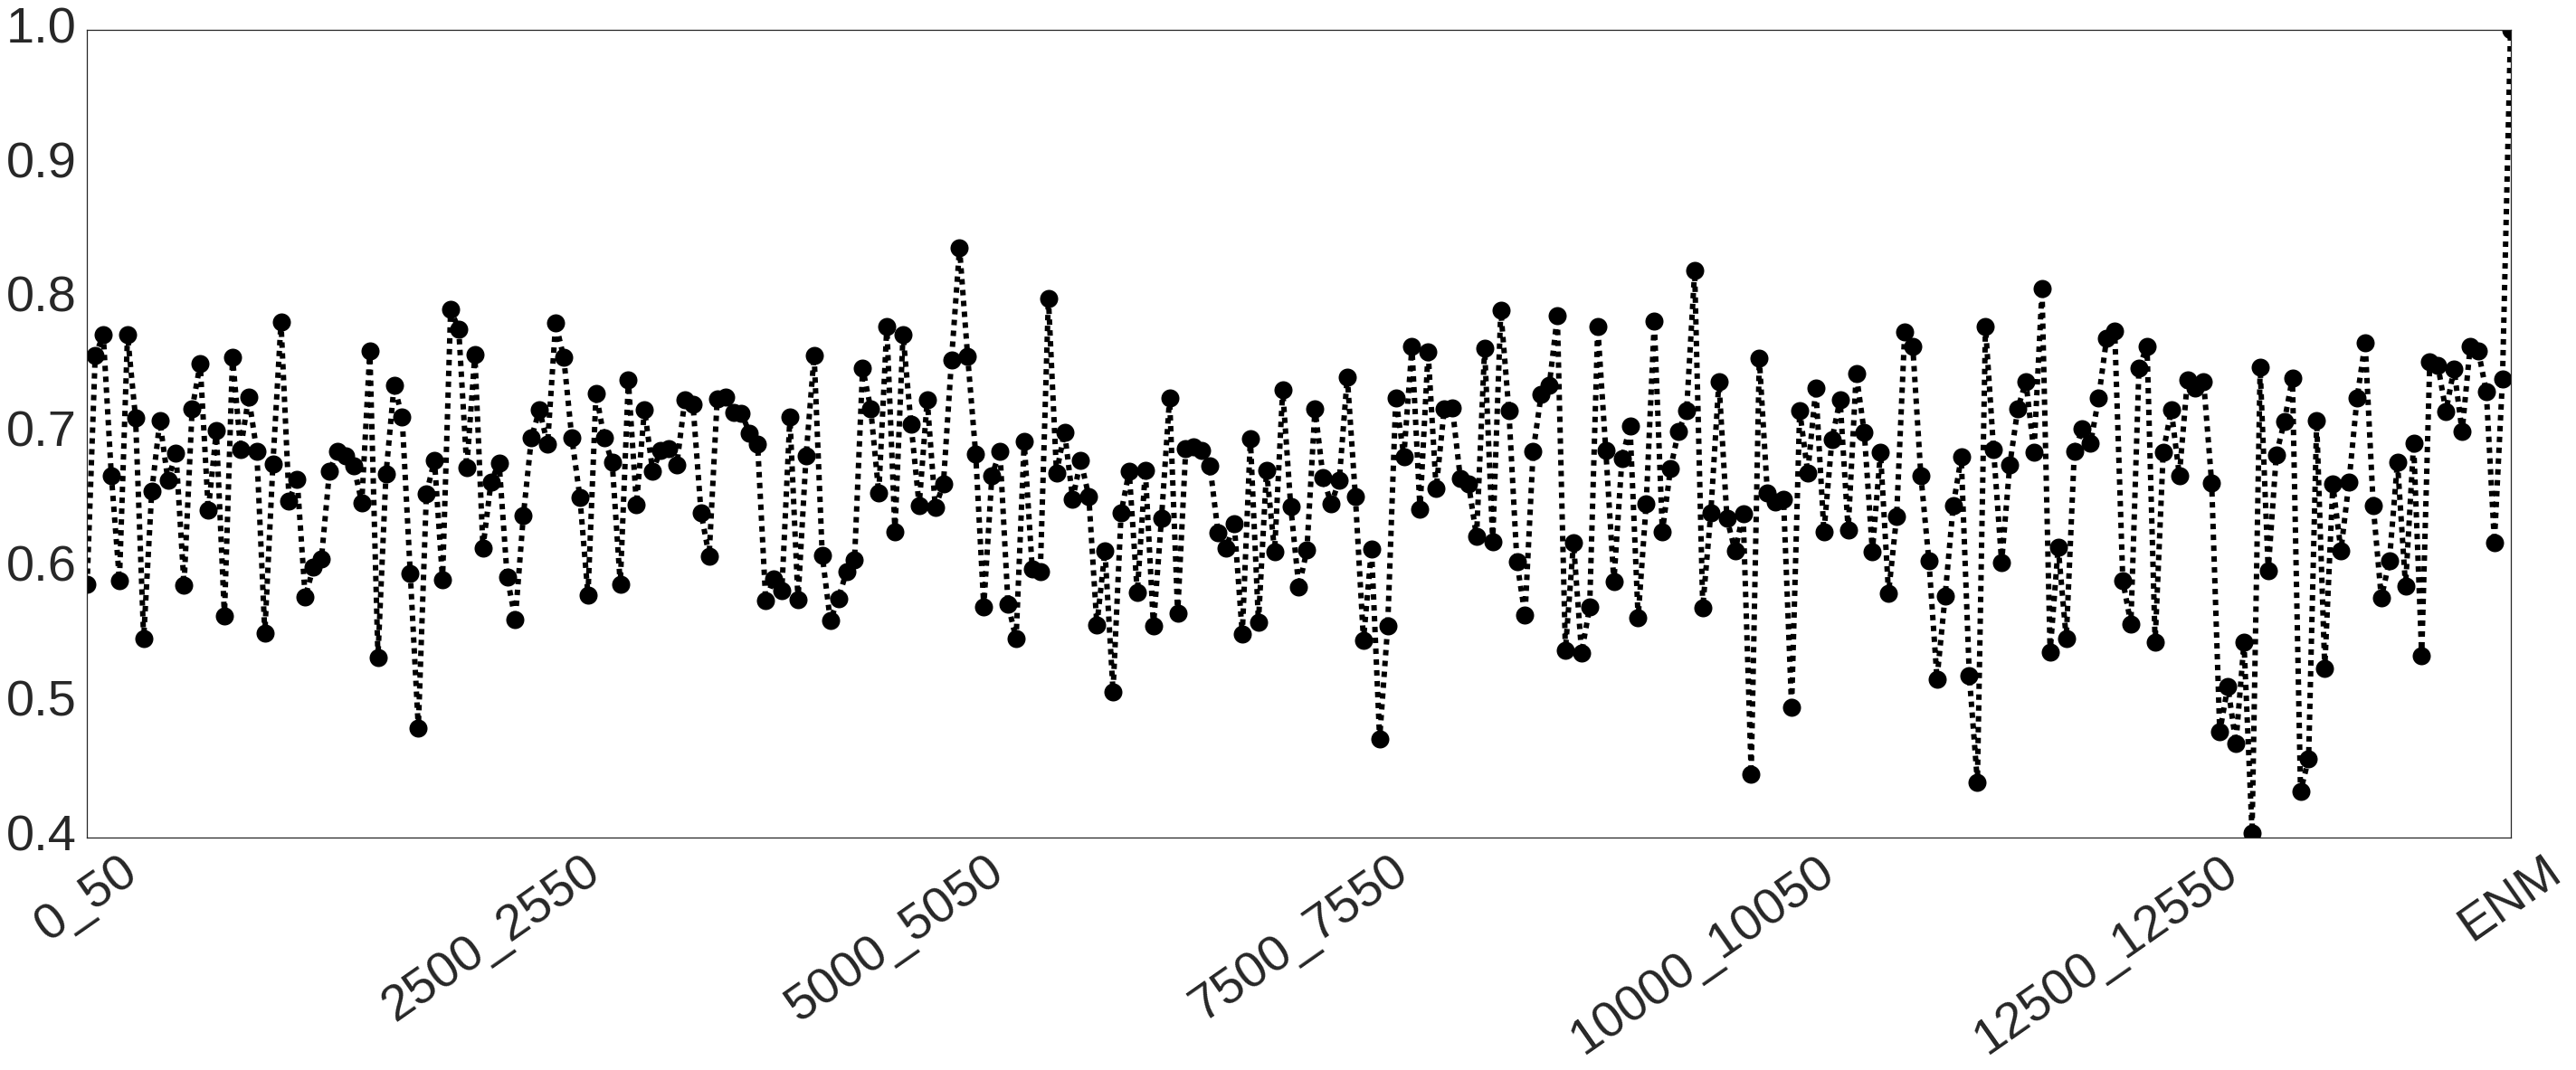

In [9]:
sns.set_style('white')
plt.figure(figsize=(48,16))
sns.set_context("poster", font_scale=3.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
df_windows.corr().ix['ENM'].plot(linestyle='dashed',marker='o',markersize=20,grid='off',linewidth=6,color='black')
plt.xticks(rotation=35.)

# %DFI Profile of ENM

In [10]:
stddev=df_windows.var(axis=1).map(sqrt)

In [79]:
mean_rawdfi = rawdfi_windows.mean(axis=1).values 

In [80]:
def pctrank(dfi,inverse=False):

    if type(dfi).__module__ != 'numpy':
        raise ValueError('Input needs to be a numpy array')

    dfiperc = [] 
    lendfi = float(len(dfi))
    
    for m in dfi:
        
        if inverse:
            amt = np.sum(dfi >=m)
        else:
            amt = np.sum(dfi <=m)
        dfiperc.append(amt/lendfi)

    return np.array(dfiperc,dtype=float)


In [83]:
rawdfi_pctrank = pctrank(mean_rawdfi)

In [85]:
rawdfi_windows['pctrank'] = rawdfi_pctrank

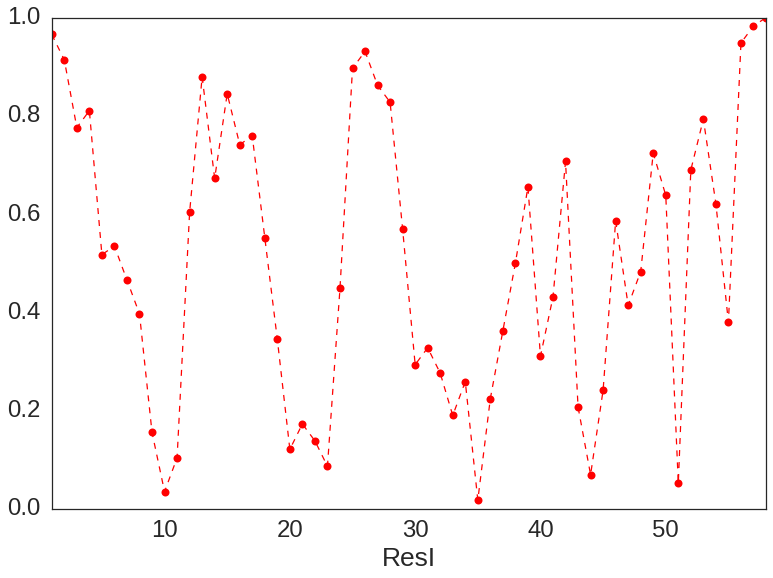

In [96]:
sel=df_windows.columns[:50]

In [101]:
df_windows.corr()

,0_50,50_100,100_150,150_200,200_250,250_300,300_350,350_400,400_450,450_500,...,14550_14600,14600_14650,14650_14700,14700_14750,14750_14800,14800_14850,14850_14900,14900_14950,14950_15000,ENM
0_50,1.000000,0.876465,0.821034,0.855302,0.884586,0.809837,0.878065,0.857824,0.848473,0.842628,...,0.792857,0.833154,0.895660,0.867667,0.856717,0.836784,0.854317,0.794703,0.808668,0.587622
50_100,0.876465,1.000000,0.903842,0.888093,0.865514,0.833277,0.867237,0.834876,0.871605,0.861146,...,0.862869,0.881510,0.911778,0.929127,0.916515,0.927589,0.920207,0.770156,0.824541,0.757667
100_150,0.821034,0.903842,1.000000,0.837891,0.810083,0.833215,0.864407,0.792304,0.849703,0.891230,...,0.830385,0.852656,0.896213,0.880771,0.903227,0.888277,0.843797,0.765357,0.879418,0.773171
150_200,0.855302,0.888093,0.837891,1.000000,0.817958,0.819373,0.851918,0.883232,0.805654,0.841213,...,0.806208,0.847550,0.873758,0.890738,0.910117,0.862561,0.906180,0.795195,0.812237,0.668769
200_250,0.884586,0.865514,0.810083,0.817958,1.000000,0.800917,0.830693,0.777415,0.890738,0.786090,...,0.850441,0.835307,0.846012,0.771879,0.835430,0.857578,0.840967,0.732812,0.795995,0.590636
250_300,0.809837,0.833277,0.833215,0.819373,0.800917,1.000000,0.894491,0.726783,0.834938,0.884463,...,0.833954,0.776923,0.837522,0.836230,0.879972,0.858624,0.786152,0.878987,0.826879,0.773294
300_350,0.878065,0.867237,0.864407,0.851918,0.830693,0.894491,1.000000,0.859177,0.866437,0.877142,...,0.850811,0.809714,0.867852,0.890615,0.901996,0.862561,0.806269,0.857332,0.822572,0.711341
350_400,0.857824,0.834876,0.792304,0.883232,0.777415,0.726783,0.859177,1.000000,0.780245,0.813159,...,0.734166,0.832231,0.802824,0.883417,0.859116,0.793903,0.808914,0.776923,0.736012,0.547818
400_450,0.848473,0.871605,0.849703,0.805654,0.890738,0.834938,0.866437,0.780245,1.000000,0.899966,...,0.861331,0.831677,0.814821,0.831001,0.889138,0.877572,0.814759,0.755575,0.829955,0.656833
450_500,0.842628,0.861146,0.891230,0.841213,0.786090,0.884463,0.877142,0.813159,0.899966,1.000000,...,0.797656,0.807623,0.855609,0.892338,0.921006,0.854071,0.804116,0.818758,0.843674,0.709311


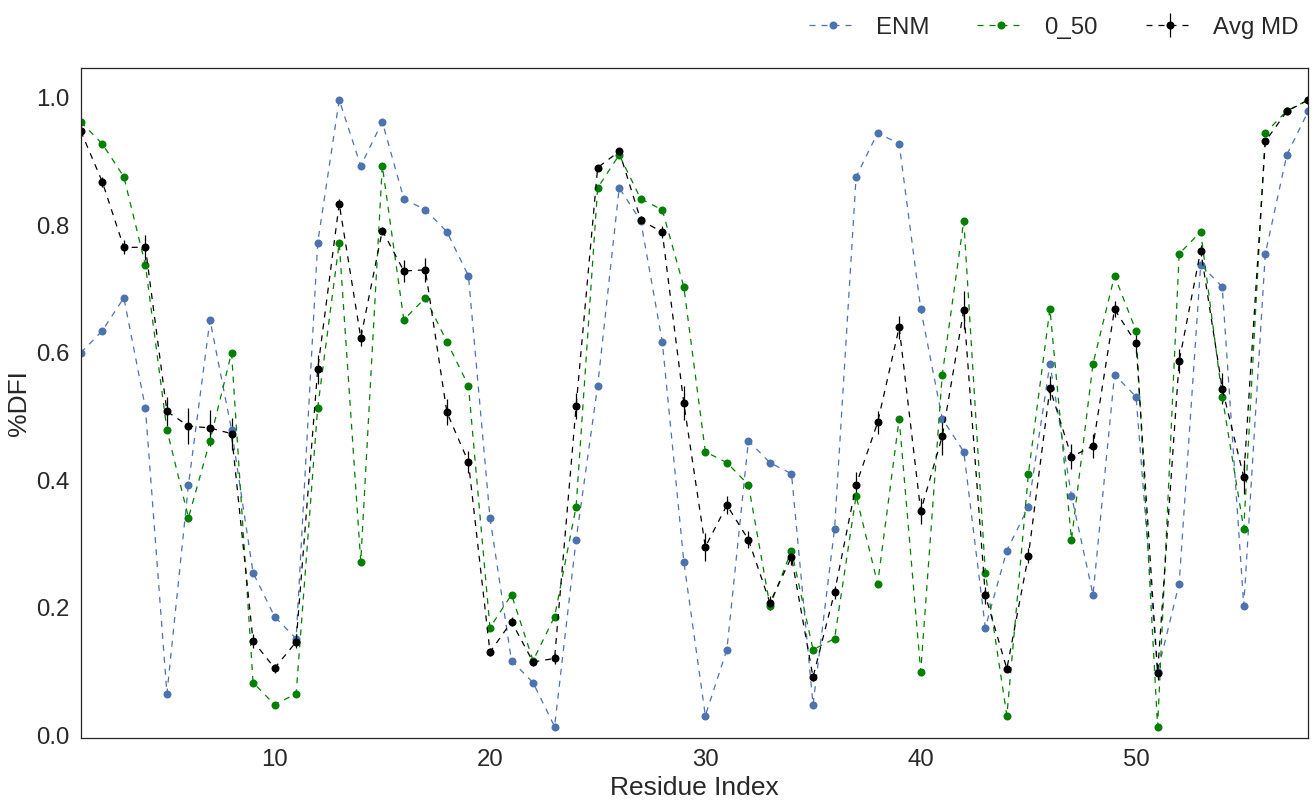

In [100]:
sns.set_style('white')
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25,"lines.markersize":8})
df_windows['ENM'].plot(linestyle='dashed',marker='o',label='ENM')
df_windows['0_50'].plot(linestyle='dashed',marker='o',color='green',label='0_50')
df_windows[sel].var(axis=1)
df_windows[sel].mean(axis=1).plot(linestyle='dashed',marker='o',color='black',label='Avg MD',yerr=stddev)
#plt.plot(rawdfi)
#rawdfi_windows['pctrank'].plot(linestyle='dashed',marker='o',color='red',label='rawdfi_pctrank')
plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=7,ncol=4, borderaxespad=0.)
plt.ylim(0,1.05)
plt.ylabel('%DFI')
plt.xlabel('Residue Index')

In [12]:
np.sqrt( df_windows.ix[5].var() )

0.15218329140142406

In [13]:
df_windows.ix[5].mean()

0.50652995761253183

# Identify Hinges based on ENM and see how consistent they are

In [14]:
hinges_sel = df_windows['ENM'] < 0.20

In [15]:
df_windows[hinges_sel]

,0_50,50_100,100_150,150_200,200_250,250_300,300_350,350_400,400_450,450_500,...,14550_14600,14600_14650,14650_14700,14700_14750,14750_14800,14800_14850,14850_14900,14900_14950,14950_15000,ENM
ResI,,,,,,,,,,,,,,,,,,,,,
5,0.482759,0.327586,0.413793,0.586207,0.275862,0.568966,0.448276,0.586207,0.500000,0.724138,...,0.275862,0.431034,0.362069,0.534483,0.534483,0.206897,0.258621,0.534483,0.568966,0.068966
10,0.051724,0.017241,0.086207,0.034483,0.224138,0.103448,0.103448,0.189655,0.034483,0.068966,...,0.155172,0.068966,0.017241,0.017241,0.120690,0.051724,0.120690,0.034483,0.086207,0.189655
11,0.068966,0.258621,0.120690,0.086207,0.362069,0.120690,0.120690,0.120690,0.189655,0.120690,...,0.241379,0.103448,0.051724,0.120690,0.017241,0.034483,0.172414,0.103448,0.137931,0.155172
21,0.224138,0.206897,0.275862,0.103448,0.155172,0.224138,0.155172,0.068966,0.086207,0.241379,...,0.137931,0.155172,0.327586,0.224138,0.068966,0.224138,0.241379,0.310345,0.362069,0.120690
22,0.120690,0.137931,0.224138,0.258621,0.086207,0.086207,0.051724,0.034483,0.103448,0.103448,...,0.017241,0.137931,0.241379,0.103448,0.051724,0.086207,0.086207,0.189655,0.206897,0.086207
23,0.189655,0.068966,0.017241,0.155172,0.120690,0.034483,0.068966,0.137931,0.172414,0.224138,...,0.051724,0.051724,0.086207,0.137931,0.034483,0.103448,0.017241,0.068966,0.034483,0.017241
30,0.448276,0.396552,0.241379,0.293103,0.517241,0.137931,0.258621,0.448276,0.431034,0.051724,...,0.224138,0.500000,0.344828,0.344828,0.379310,0.448276,0.413793,0.344828,0.275862,0.034483
31,0.431034,0.310345,0.258621,0.431034,0.568966,0.379310,0.293103,0.344828,0.258621,0.017241,...,0.362069,0.551724,0.465517,0.362069,0.241379,0.465517,0.568966,0.293103,0.465517,0.137931
35,0.137931,0.086207,0.344828,0.051724,0.137931,0.017241,0.034483,0.086207,0.017241,0.137931,...,0.068966,0.189655,0.034483,0.051724,0.086207,0.017241,0.034483,0.017241,0.103448,0.051724


In [63]:
allhinges = df_windows < 0.2

(0, 1)

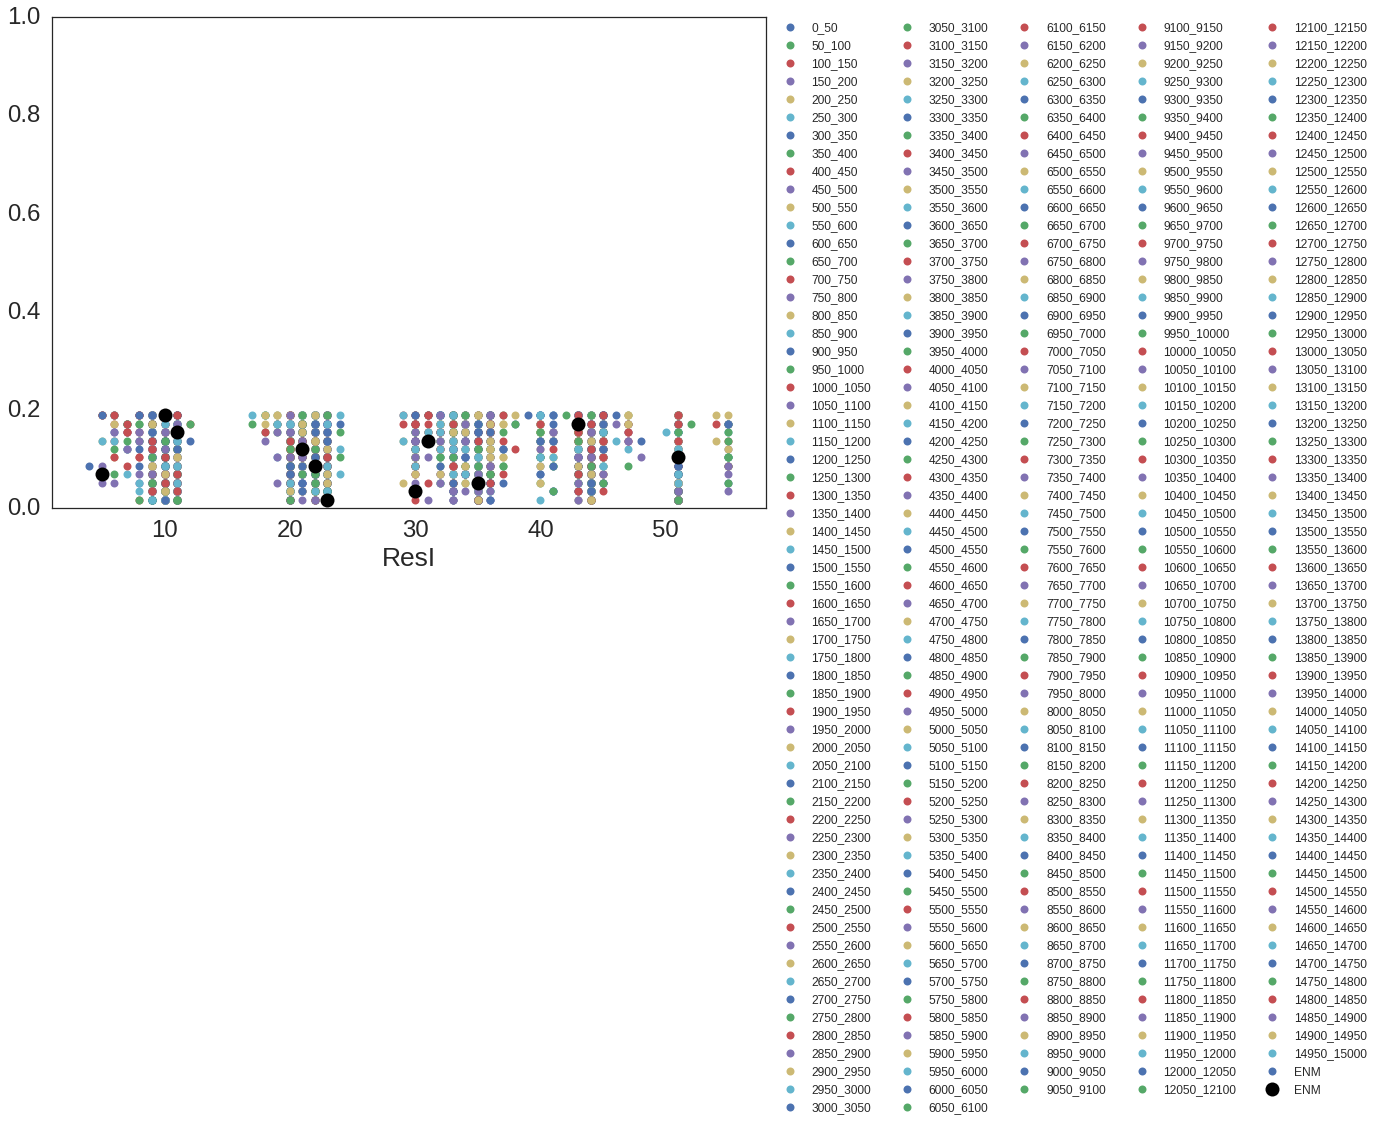

In [66]:
df_windows[allhinges].plot(marker='o',linestyle='')
df_windows[allhinges].ENM.plot(marker='o',linestyle='',color='black',markersize=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=5, borderaxespad=0.,fontsize=12)

plt.ylim(0,1)

# MD Distribution of Hinges 

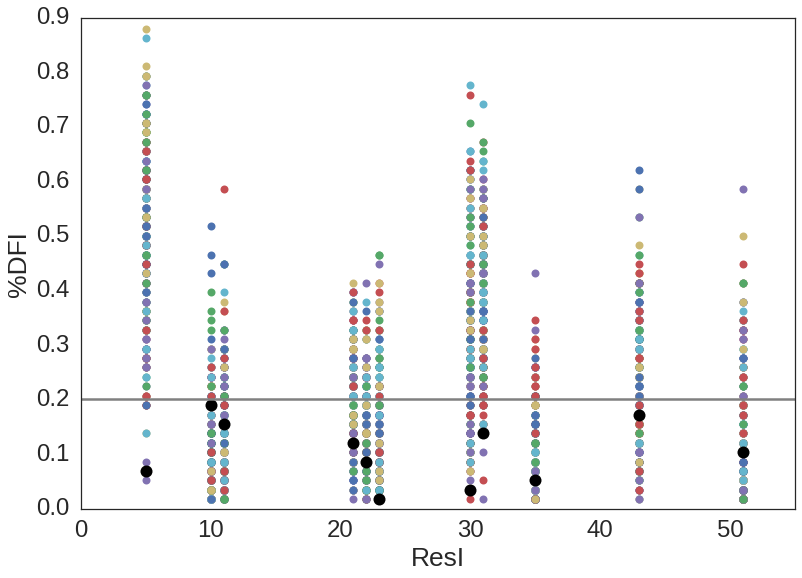

In [30]:
df_windows[hinges_sel].plot(marker='o',linestyle='')
df_windows[hinges_sel].ENM.plot(marker='o', linestyle='',markersize=12,color='black')
plt.ylabel('%DFI')
plt.xlim(0,55)
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=4, borderaxespad=0.,fontsize=14)
plt.legend([])

In [38]:
df_windows[df_windows['0_50'] < 0.2]

,0_50,50_100,100_150,150_200,200_250,250_300,300_350,350_400,400_450,450_500,...,14550_14600,14600_14650,14650_14700,14700_14750,14750_14800,14800_14850,14850_14900,14900_14950,14950_15000,ENM
ResI,,,,,,,,,,,,,,,,,,,,,
9,0.086207,0.051724,0.034483,0.017241,0.051724,0.068966,0.224138,0.379310,0.068966,0.086207,...,0.120690,0.086207,0.103448,0.189655,0.103448,0.120690,0.068966,0.172414,0.017241,0.258621
10,0.051724,0.017241,0.086207,0.034483,0.224138,0.103448,0.103448,0.189655,0.034483,0.068966,...,0.155172,0.068966,0.017241,0.017241,0.120690,0.051724,0.120690,0.034483,0.086207,0.189655
11,0.068966,0.258621,0.120690,0.086207,0.362069,0.120690,0.120690,0.120690,0.189655,0.120690,...,0.241379,0.103448,0.051724,0.120690,0.017241,0.034483,0.172414,0.103448,0.137931,0.155172
20,0.172414,0.172414,0.189655,0.120690,0.034483,0.275862,0.137931,0.017241,0.051724,0.155172,...,0.103448,0.034483,0.172414,0.206897,0.137931,0.137931,0.206897,0.241379,0.172414,0.344828
22,0.120690,0.137931,0.224138,0.258621,0.086207,0.086207,0.051724,0.034483,0.103448,0.103448,...,0.017241,0.137931,0.241379,0.103448,0.051724,0.086207,0.086207,0.189655,0.206897,0.086207
23,0.189655,0.068966,0.017241,0.155172,0.120690,0.034483,0.068966,0.137931,0.172414,0.224138,...,0.051724,0.051724,0.086207,0.137931,0.034483,0.103448,0.017241,0.068966,0.034483,0.017241
35,0.137931,0.086207,0.344828,0.051724,0.137931,0.017241,0.034483,0.086207,0.017241,0.137931,...,0.068966,0.189655,0.034483,0.051724,0.086207,0.017241,0.034483,0.017241,0.103448,0.051724
36,0.155172,0.120690,0.465517,0.362069,0.258621,0.206897,0.241379,0.206897,0.344828,0.293103,...,0.086207,0.172414,0.206897,0.155172,0.224138,0.275862,0.189655,0.120690,0.327586,0.327586
40,0.103448,0.344828,0.396552,0.275862,0.500000,0.620690,0.344828,0.172414,0.689655,0.465517,...,0.379310,0.448276,0.189655,0.258621,0.482759,0.603448,0.275862,0.482759,0.482759,0.672414


In [53]:
last=df_windows.columns[-10:]

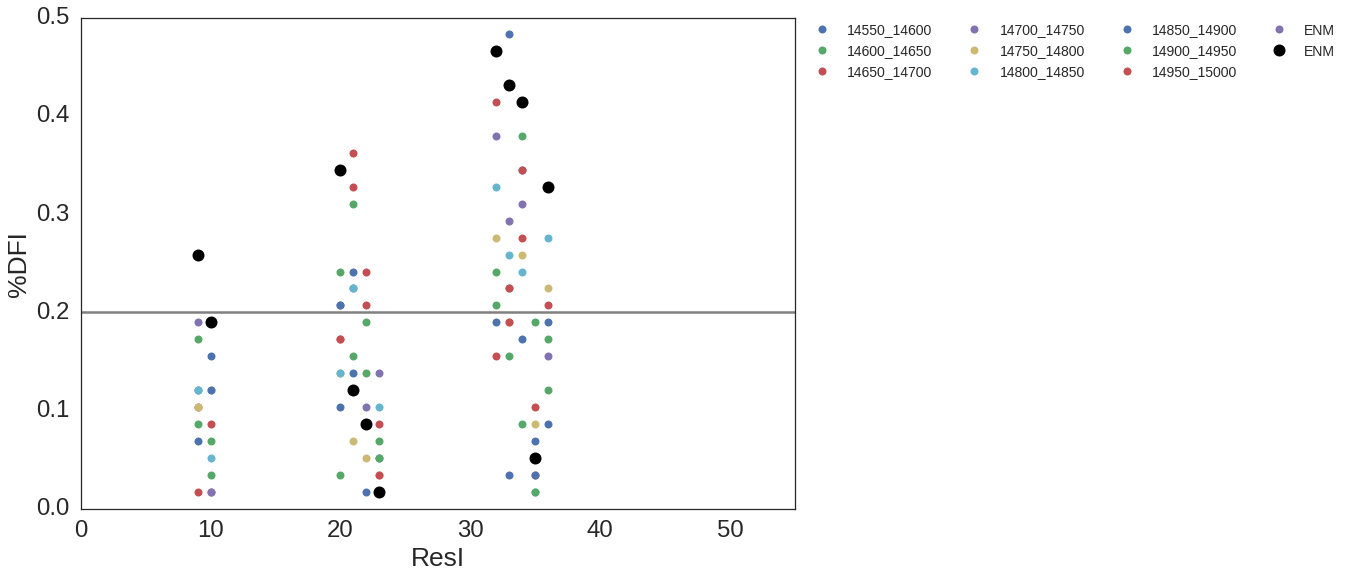

In [54]:
first_hinge_sel=df_windows[last[0]] < 0.2
df_windows[first_hinge_sel][last].plot(marker='o',linestyle='')
df_windows[first_hinge_sel].ENM.plot(marker='o', linestyle='',markersize=12,color='black')
plt.ylabel('%DFI')
plt.xlim(0,55)
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=4, borderaxespad=0.,fontsize=14)
#plt.legend([])

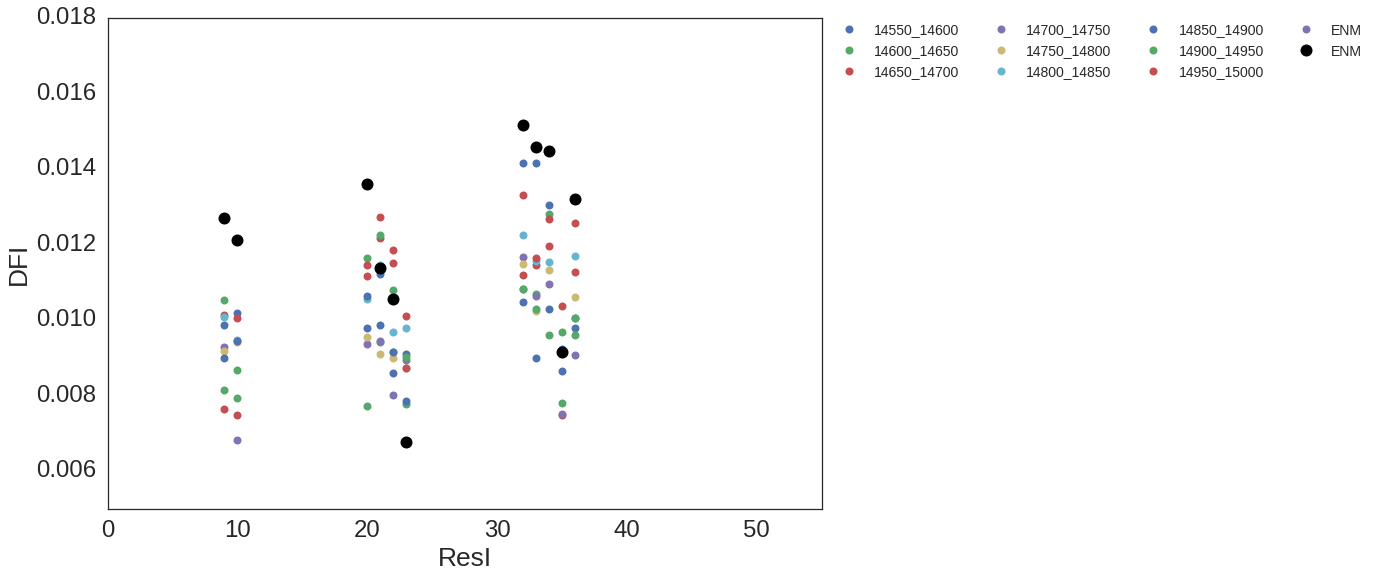

In [76]:
first_hinge_sel=df_windows[last[0]] < 0.2
rawdfi_windows[first_hinge_sel][last].plot(marker='o',linestyle='')
rawdfi_windows[first_hinge_sel].ENM.plot(marker='o', linestyle='',markersize=12,color='black')
plt.ylabel('DFI')
plt.xlim(0,55)
plt.ylim(0.005,0.018)
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=4, borderaxespad=0.,fontsize=14)

In [42]:
df_windows.plot(ax=ax[0],marker='o')
df_windows['ENM'].plot(ax=ax[0],color='black',linestyle='dashed', linewidth=3,marker='o',markersize=8)
ax[0].set_ylabel('%DFI')
ax[0].legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=14)
ax[0].axhline(0.2, linestyle='--', color='red', alpha=0.99);

# MD Distribution of Hinges for top correlated values 

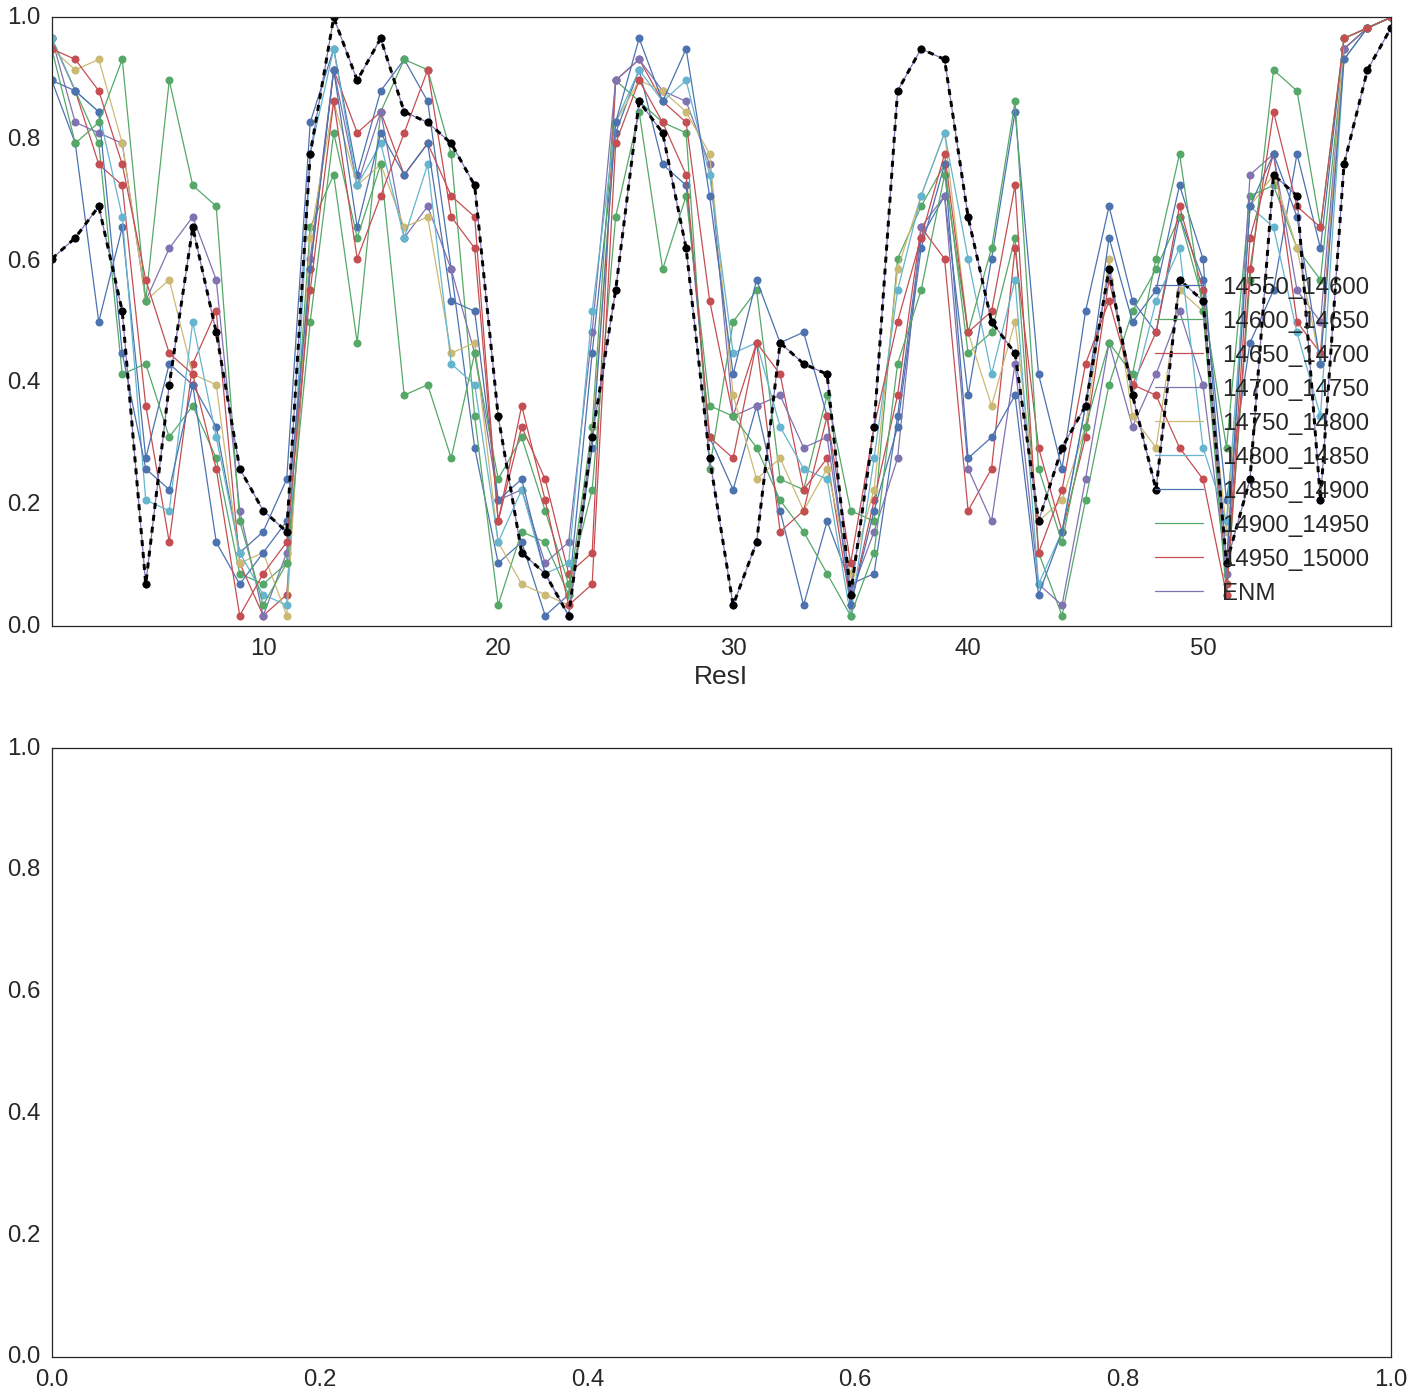

In [55]:
fig, ax = plt.subplots(2, figsize=(24,24))

df_windows[last].plot(ax=ax[0],marker='o')
df_windows['ENM'].plot(ax=ax[0],color='black',linestyle='dashed', linewidth=3,marker='o',markersize=8)
plt.legend([])

In [18]:
mean=df_windows.mean(axis=1)

In [19]:
stddev = df_windows.var(axis=1)

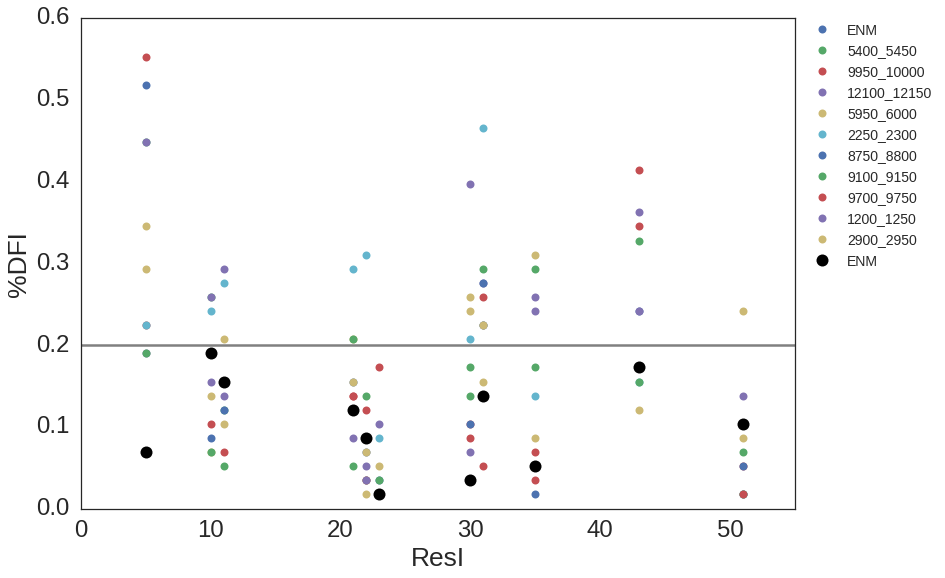

In [20]:
df_hinges[topten].plot(marker='o',linestyle='')
df_hinges[topten].ENM.plot(marker='o', linestyle='',markersize=12,color='black')
plt.ylabel('%DFI')
plt.xlim(0,55)
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=14)

(0, 0.06)

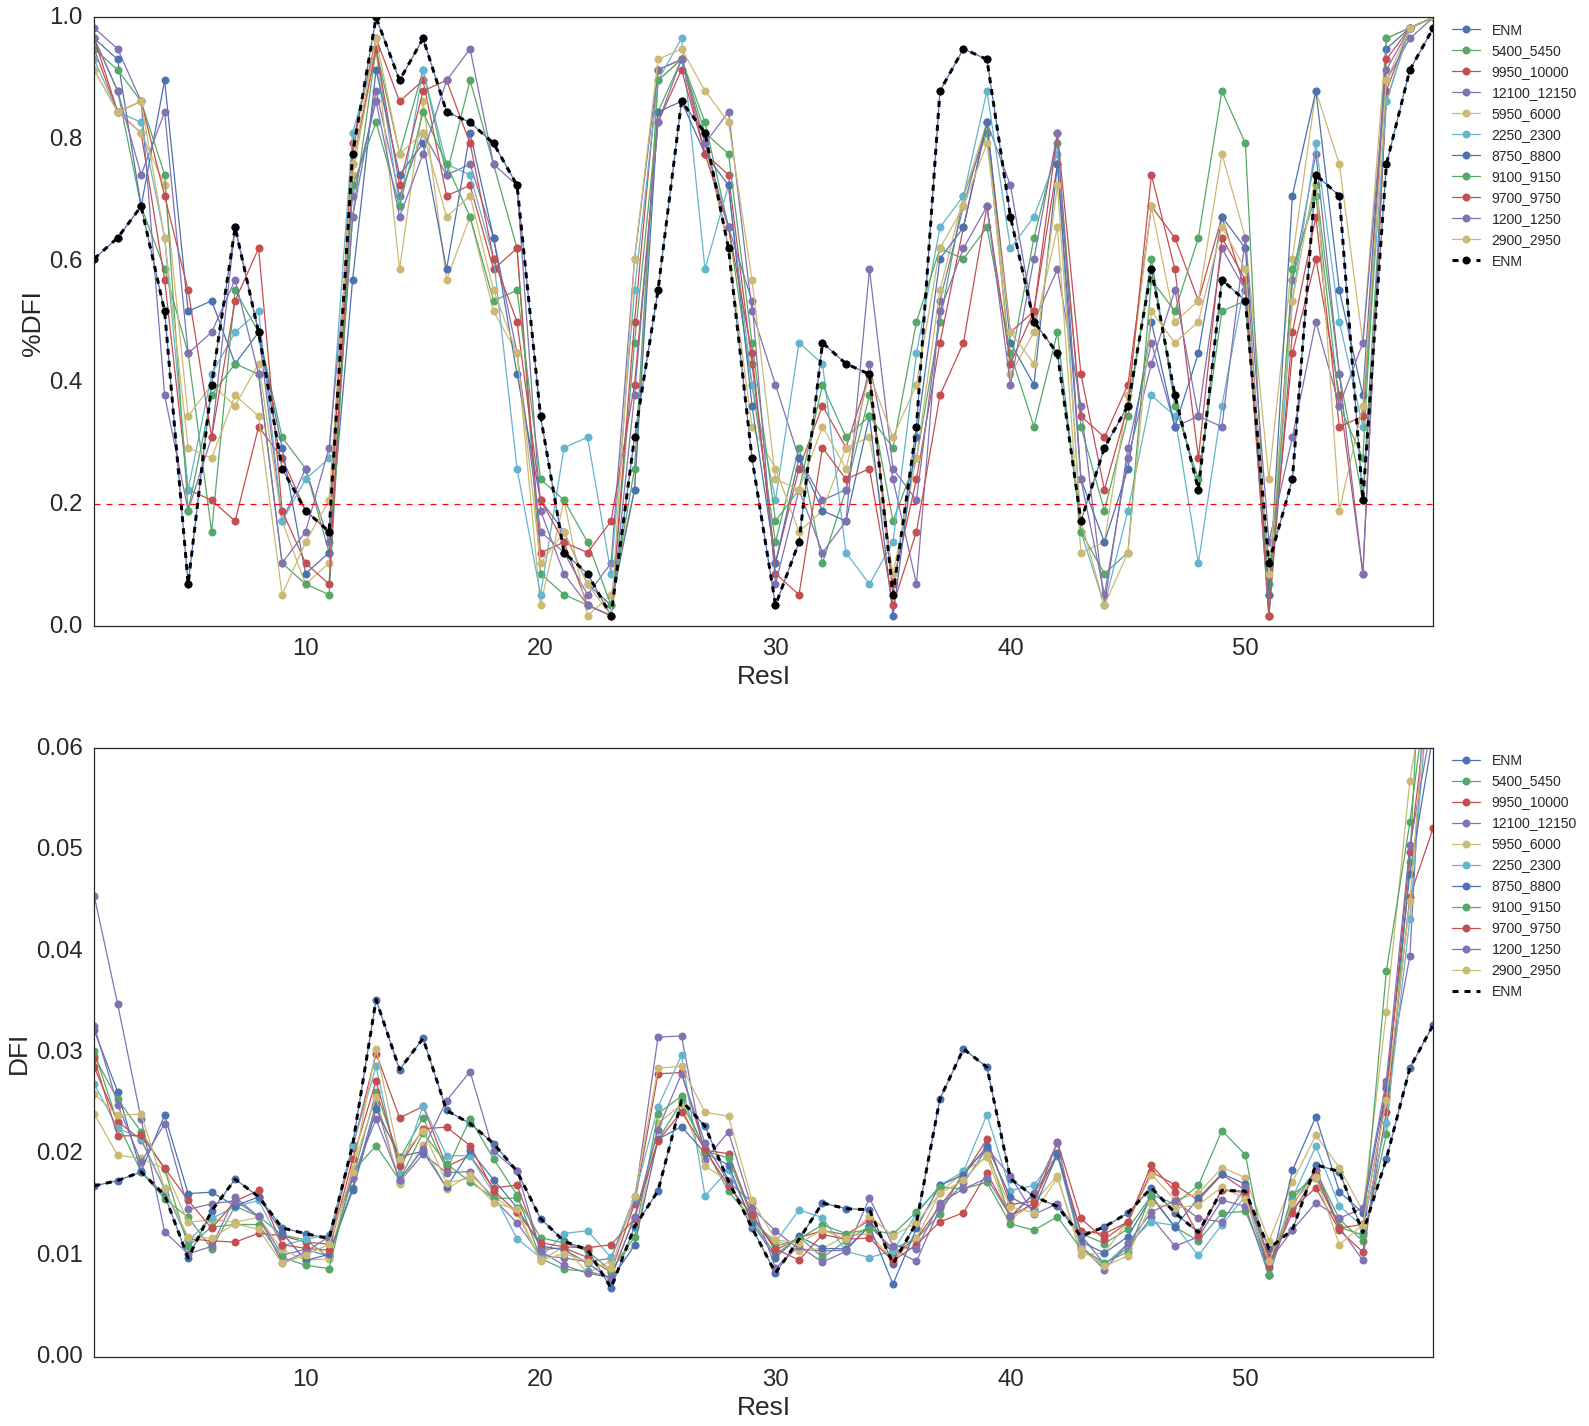

In [68]:
fig, ax = plt.subplots(2, figsize=(24,24))

df_windows[topten[:]].plot(ax=ax[0],marker='o')
df_windows['ENM'].plot(ax=ax[0],color='black',linestyle='dashed', linewidth=3,marker='o',markersize=8)
ax[0].set_ylabel('%DFI')
ax[0].legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=14)
ax[0].axhline(0.2, linestyle='--', color='red', alpha=0.99);

rawdfi_windows[topten[:]].plot(ax=ax[1],marker='o')
rawdfi_windows['ENM'].plot(ax=ax[1],color='black',linestyle='dashed', linewidth=3)
ax[1].legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=14)
ax[1].set_ylabel('DFI')
ax[1].set_ylim(0,0.06)

In [22]:
diagonals=zip(np.arange(150),np.arange(150)+1)

In [23]:
df_windows.corr().iloc[0,0]

1.0

In [24]:
df_windows.corr().iloc[0,1]

0.87646497892890651

In [25]:
sum(1 for i in df_windows.columns)

301

In [26]:
corrwin=[df_windows.corr().iloc[i,j] for i,j in diagonals]
cols=df_windows.columns
cols

Index([u'0_50', u'50_100', u'100_150', u'150_200', u'200_250', u'250_300',
       u'300_350', u'350_400', u'400_450', u'450_500',
       ...
       u'14550_14600', u'14600_14650', u'14650_14700', u'14700_14750',
       u'14750_14800', u'14800_14850', u'14850_14900', u'14900_14950',
       u'14950_15000', u'ENM'],
      dtype='object', length=301)

# Calculation of Correlation of Each Window and Consistency of Hinges in MD

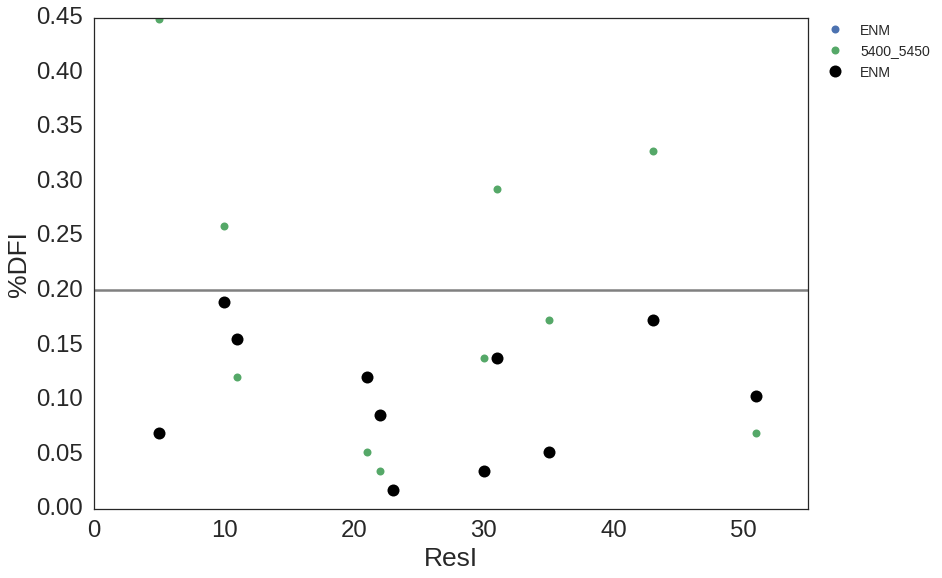

In [27]:
df_hinges[top].plot(marker='o',linestyle='')
df_hinges.ENM.plot(marker='o', linestyle='',markersize=12,color='black')
plt.ylabel('%DFI')
plt.xlim(0,55)
plt.axhline(y=.2, color = 'grey',linewidth=2.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2,ncol=1, borderaxespad=0.,fontsize=14)